 This program uses an artificial intelligence recurrent neural network called Long Short Term Memory(LSTM). to predict the closing stock price of a corporation (Tesla Inc) using the past 60 days of the stock price.

import numpy as np
import pandas as pd
import yfinance as yfin
from pandas_datareader import data as web 
import datetime

google=web.get_data_yahoo('TSLA', start="2020-01-01", end="2020-04-07")
google.head()

In [6]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [7]:
#Get the data quote
df=web.DataReader('AAPL','yahoo',start='2012-01-01', end='2019-12-17')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.575912
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.643498
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.783865
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.917506
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.897016
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,66.616837
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,66.786583
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,67.694420


In [8]:
#get the number of rows and columns in the data set
df.shape

(2003, 6)

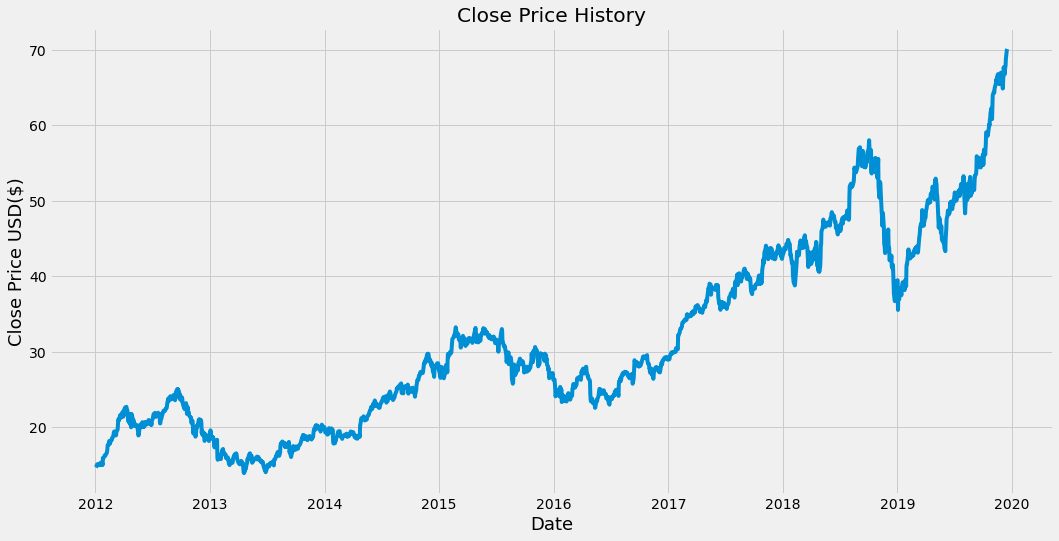

In [9]:
#visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.show()

In [10]:
#Creating the new dataframe with only the close column
data=df.filter(['close'])
#convert the dataframe to a numpy array
dataset=data.values
#Get the number of rows to train model on
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

1603

In [11]:
#Scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(np.array(dataset).reshape(-1,1))
scaled_data

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.

In [12]:
#create the training data set
#create the scaled training data set
train_data=scaled_data[0:training_data_len,:]
#split the data into x_train and Y_train data sets
x_train=[]
y_train=[]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<60:
        print(x_train)
        print(y_train)
        print()

NameError: name 'scaled_data' is not defined